# LG 입자 형태분석 모델개발 해커톤 base line

&nbsp;

## 기본설정

&nbsp;

### data load

In [1]:
%pwd

'/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project'

In [2]:
base_path = '/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/data/'

&nbsp;

### pytorch 버전확인

In [3]:
import torch
import os
torch.__version__

'1.13.0.dev20220622'

&nbsp;

### mmdetection 폴더 생성 및 이동

In [4]:
os.chdir('content')
#os.mkdir('lg_test')
os.chdir('lg_test')

- 경로 확인

In [5]:
os.getcwd()

'/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test'

&nbsp;

### mmdetection 설치
- colab 기준으로 설정한 설치 과정 만약 임의의 pytorch 버전 사용 시 밑의 과정은 달라질 수 있음

In [6]:
#!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu113/torch1.12.0/index.html
# !git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
#!pip install -r requirements/build.txt
# !pip install -v -e .
# !pip install mmdet

/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection


- 폴더 확인

In [7]:
os.listdir()

['demo',
 'artifacts',
 'tools',
 'docker',
 '.DS_Store',
 'checkpoint',
 'pytest.ini',
 'LICENSE',
 'requirements.txt',
 '.pre-commit-config.yaml',
 'CITATION.cff',
 '.owners.yml',
 'work_dirs',
 'resources',
 'tests',
 'MANIFEST.in',
 'requirements',
 'docs',
 'README_zh-CN.md',
 '.readthedocs.yml',
 'README.md',
 'setup.py',
 '.gitignore',
 'mmdet.egg-info',
 'configs',
 '.github',
 '.dev_scripts',
 'setup.cfg',
 '.git',
 'model-index.yml',
 'data',
 '.circleci',
 'wandb',
 'mmdet']

&nbsp;

## 데이터 다운 및 데이터 확인

- 해당 경로 확인

In [8]:
os.getcwd()

'/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection'

### 데이터 폴더 생성 및 이동

In [9]:
#%mkdir data

In [10]:
%cd data

/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/data


&nbsp;

### 데이터 다운 [lg 데이터](https://drive.google.com/file/d/1kepvD1uQqhRBhkNb08r3rmocA2U3-3NF/view)

(로컬에 다운 완료)

In [11]:
# !unzip -qq  "/content/lg_test/mmdetection/data/dataset.zip"

&nbsp;

### label_test.json 수정

In [12]:
import json

with open(base_path + "dataset/label_test.json") as f:
  data_train = json.load(f)

data_train['categories'] = [{'id': 1, 'name': 'Normal'}]

print(data_train.keys())

with open(base_path + 'dataset/test.json', 'w') as f:
    json.dump(data_train, f)

dict_keys(['images', 'categories'])


&nbsp;

## Mask R-CNN base-line

### config 사용

- mmdetection에서 제공하는 config 사용 시 원하는 변수로 설정해야 합니다.
- 빠르게 모델 inference를 수행할 때 좋습니다.
- json 출력 파일을 만들기 위해 mmdetection/tools/test.py 에서 필요한 부분에 변경을 수행했습니다.


&nbsp;

In [13]:
%pwd

'/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/data'

### mask r_cnn 사전 가중치 다운로드

In [14]:
os.chdir('/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/')
#os.mkdir('checkpoint')
os.chdir('checkpoint')

from requests import get 

def download(url, file_name):
    with open(file_name, "wb") as file:   
        response = get(url)               
        file.write(response.content)


# url = "https://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_1x_coco/mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth"
# download(url,"mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth")

os.chdir('/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/')

In [15]:
os.getcwd()

'/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection'

In [16]:
mm_path = '/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection'

### config 지정 -trial 2 0726

In [17]:
# !pip install wandb

In [18]:
#wandb setting first 
import wandb
wandb.login()

wandb: Currently logged in as: goeun. Use `wandb login --relogin` to force relogin


True

In [19]:
# !pip install mmcv-full
# !pip install terminaltables
# !pip install imagecorruptions
# !pip install -q pycocotools

In [20]:
%pwd

'/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection'

In [21]:
import mmcv
from mmcv.runner import load_checkpoint
from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector
from mmdet.apis import set_random_seed

#decoupled_solo_light_r50_fpn_3x_coco_20210906_142703-e70e226f.pth

def set_config():
  # 사용할 모델 초기 py 설정
  config = './configs/ms_rcnn/ms_rcnn_x101_32x4d_fpn_1x_coco.py'

  # config 불러오기
  cfg = mmcv.Config.fromfile(config)

  # config 에 base 기록
  cfg.base = '../msrcnn/ms_rcnn_x101_32x4d_fpn_1x_coco.py'

  # 데이터셋 지정
  cfg.dataset_type = 'CocoDataset'

  # data_root는 사용자가 저장한 데이터가 있는 폴더 전까지
  data_root = './data/dataset/'

  # class 설정
  cfg.classes = ('Normal',)

  # train, val, test 데이터셋에 대한 type, data_root, ann_file, img_prefix 설정

  cfg.data.samples_per_gpu=1
  cfg.data.workers_per_gpu=0

  cfg.data.train.data_root = data_root 
  cfg.data.train.ann_file = 'label(polygon)_train.json' 
  cfg.data.train.img_prefix = 'train/' #train_mask/ 했어야..
  cfg.data.train.classes = cfg.classes

  cfg.data.val.data_root = data_root
  cfg.data.val.ann_file = 'label(polygon)_train.json'
  cfg.data.val.img_prefix = 'train/'  #train_mask/ 했어야..
  cfg.data.val.classes = cfg.classes

  cfg.data.test.data_root = data_root
  cfg.data.test.ann_file = 'test.json'
  cfg.data.test.img_prefix = 'test/'
  cfg.data.test.classes = cfg.classes

  #In model  클래스 수 지정 
  # cfg.model.mask_head.num_classes = 1
  
  cfg.model.roi_head.bbox_head.num_classes = 1
  cfg.model.roi_head.mask_head.num_classes = 1
  cfg.model.roi_head.mask_iou_head.num_classes = 1


  # 사전 훈련 모델 지정 ... ???? 
  cfg.checkpoint_config = dict(interval=4,out_dir='work_dirs/lg_mask/')
  cfg.load_from = '/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/checkpoint/ms_rcnn_x101_32x4d_fpn_1x_coco_20200206-81fd1740.pth'

  # 가중치 저장 위치
  cfg.work_dir =  './work_dirs/lg_cfg2/'

  # 평가 지표로 설정
  cfg.evaluation.metric = ['bbox', 'segm']

  # epoch 설정
  cfg.runner = dict(type='EpochBasedRunner', max_epochs=15) #more? 

  # batch size 설정
  cfg.auto_scale_lr = dict(enable=False, base_batch_size=2)
#   cfg.lr_config = dict(
#     policy='CosineAnnealing',
#     by_epoch=False,
#     min_lr=0)

  cfg.log_config.hooks = [
     dict(type='TextLoggerHook'),
     dict(type='MMDetWandbHook',
          init_kwargs={'project': 'mmdetection',
                       'entity' : 'goeun',
                       'config': {'lr': 1e-4, 'batch_size':5},
                       'tags': ['resnet50', 'sgd'] },
          interval=10,
          log_checkpoint=True,
          log_checkpoint_metadata=True,
          num_eval_images=100,
          bbox_score_thr=0.3)]

  # gpu 설정 및 seed 설정
  cfg.seed = 0
  cfg.gpu_ids = range(1)
  cfg.device= 'cpu' # for local

  return cfg

In [22]:
cfg = set_config()

In [23]:
# cfg.model.roi_head

In [24]:
# print(cfg.pretty_text)
# cfg.model.roi_head

&nbsp;

### 모델 훈련

1. 220726_ms_rcnn_r50_fpn_1x_coco.py **epoch_2**  [**public score: 0.3864911464**]
2. 220729_ms_rcnn_r50_fpn_1x_coco.py **epoch=40** , [**public score: 0.4676406072**]
3. 220729_decoupled_solo_light_r50_fpn_3x_coco.py **epoch=40**, [**public score: 0.5155633836**]
4. 220801_ms_rcnn_x101_32x4d_fpn_1x_coco.py +pre-traning **epoch=2** [**public score: 0.5469710628**]
5. 220801_Mask2Former+pre-traning **epoch=2** [**public score: 0.5137975763**]
6. 220802_ms_rcnn_x101_32x4d_fpn_1x_coco.py +lr0.0002_epoch15_pret_batch2 +pre-traning **epoch=15** [**public score: **]

In [25]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# dataset 생성 및 model 설정

datasets = [build_dataset(cfg.data.train)]
model = build_detector(cfg.model)
model.CLASSES = datasets[0].CLASSES

# 훈련
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


2022-08-01 15:09:54,947 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.


loading annotations into memory...


2022-08-01 15:09:55,293 - mmdet - INFO - load checkpoint from local path: /Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/checkpoint/ms_rcnn_x101_32x4d_fpn_1x_coco_20200206-81fd1740.pth
2022-08-01 15:09:55,390 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).


Done (t=0.33s)
creating index...
index created!


2022-08-01 15:09:57,825 - mmdet - WARNING - No meta information found in the runner. 
wandb: Downloading large artifact val:v1, 212.64MB. 202 files... Done. 0:0:0.0
2022-08-01 15:16:04,249 - mmdet - INFO - Epoch [1][50/520]	lr: 1.978e-03, eta: 13:49:49, time: 6.424, data_time: 0.207, loss_rpn_cls: 0.5737, loss_rpn_bbox: 0.2183, loss_cls: 0.5440, acc: 71.9883, loss_bbox: 0.6776, loss_mask: 0.4300, loss_mask_iou: 0.0418, loss: 2.4855
2022-08-01 15:21:21,885 - mmdet - INFO - Epoch [1][100/520]	lr: 3.976e-03, eta: 13:39:52, time: 6.353, data_time: 0.165, loss_rpn_cls: 0.1771, loss_rpn_bbox: 0.1856, loss_cls: 0.4341, acc: 81.1172, loss_bbox: 0.5617, loss_mask: 0.3229, loss_mask_iou: 0.0066, loss: 1.6880
2022-08-01 15:26:40,264 - mmdet - INFO - Epoch [1][150/520]	lr: 5.974e-03, eta: 13:33:39, time: 6.368, data_time: 0.171, loss_rpn_cls: 0.1674, loss_rpn_bbox: 0.1830, loss_cls: 0.4150, acc: 81.9688, loss_bbox: 0.5206, loss_mask: 0.2944, loss_mask_iou: 0.0056, loss: 1.5858
2022-08-01 15:31:56,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.4 task/s, elapsed: 1174s, ETA:     0s

2022-08-01 16:25:23,533 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.17s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=34.37s).
Accumulating evaluation results...


2022-08-01 16:25:58,832 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.298
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.575
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.282
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.216
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.323
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.356
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.409
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.409
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.409
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.262
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.432
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.67s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=35.36s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-01 16:26:35,425 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.310
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.576
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.308
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.195
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.333
 Average Precision  (AP) @[ IoU

DONE (t=0.66s).


wandb: Network error (ConnectionError), entering retry loop.
2022-08-01 16:32:08,271 - mmdet - INFO - Epoch [2][50/520]	lr: 2.000e-02, eta: 12:19:18, time: 6.358, data_time: 0.191, loss_rpn_cls: 0.1494, loss_rpn_bbox: 0.1966, loss_cls: 0.3905, acc: 83.3984, loss_bbox: 0.5158, loss_mask: 0.2907, loss_mask_iou: 0.0049, loss: 1.5478
2022-08-01 16:37:23,939 - mmdet - INFO - Epoch [2][100/520]	lr: 2.000e-02, eta: 12:15:54, time: 6.313, data_time: 0.169, loss_rpn_cls: 0.1672, loss_rpn_bbox: 0.2014, loss_cls: 0.4238, acc: 81.8555, loss_bbox: 0.5235, loss_mask: 0.2968, loss_mask_iou: 0.0054, loss: 1.6182
2022-08-01 16:42:41,332 - mmdet - INFO - Epoch [2][150/520]	lr: 2.000e-02, eta: 12:12:32, time: 6.348, data_time: 0.178, loss_rpn_cls: 0.1642, loss_rpn_bbox: 0.1964, loss_cls: 0.4006, acc: 82.5898, loss_bbox: 0.5178, loss_mask: 0.2869, loss_mask_iou: 0.0050, loss: 1.5709
2022-08-01 16:47:57,617 - mmdet - INFO - Epoch [2][200/520]	lr: 2.000e-02, eta: 12:08:43, time: 6.326, data_time: 0.168, los

[>>>>>>>>>>>>>                ] 237/520, 0.4 task/s, elapsed: 531s, ETA:   634s

wandb: Network error (ConnectionError), entering retry loop.


[>>>>>>>>>>>>>>>>>>>>>>>>>   ] 470/520, 0.4 task/s, elapsed: 1051s, ETA:   112s

wandb: Network error (ConnectionError), entering retry loop.


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.4 task/s, elapsed: 1175s, ETA:     0s

2022-08-01 17:41:25,615 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=34.58s).
Accumulating evaluation results...


2022-08-01 17:42:01,174 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.350
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.637
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.354
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.267
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.369
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.423
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.460
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.460
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.460
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.324
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.478
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.72s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=38.18s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-01 17:42:40,770 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.351
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.633
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.361
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.234
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.372
 Average Precision  (AP) @[ IoU

DONE (t=0.82s).


2022-08-01 17:51:47,050 - mmdet - INFO - Epoch [3][50/520]	lr: 2.000e-02, eta: 11:45:47, time: 10.569, data_time: 0.274, loss_rpn_cls: 0.1210, loss_rpn_bbox: 0.1810, loss_cls: 0.3971, acc: 82.9570, loss_bbox: 0.4931, loss_mask: 0.2897, loss_mask_iou: 0.0048, loss: 1.4867
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
2022-08-01 18:00:11,592 - mmdet - INFO - Epoch [3][100/520]	lr: 2.000e-02, eta: 11:58:56, time: 10.091, data_time: 0.217, loss_rpn_cls: 0.1298, loss_rpn_bbox: 0.1753, loss_cls: 0.3752, acc: 84.0039, loss_bbox: 0.4906, loss_mask: 0.2826, loss_mask_iou: 0.0047, loss: 1.4582
wandb: Network error (ConnectionError), entering retry loop.
2022-08-01 18:05:31,932 - mmdet - INFO - Epoch [3][150/520]	lr: 2.000e-02, eta: 11:53:12, time: 6.407, data_time: 0.181, loss_rpn_cls: 0.1581, loss_rp

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.4 task/s, elapsed: 1181s, ETA:     0s

2022-08-01 19:03:59,085 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=34.14s).
Accumulating evaluation results...


2022-08-01 19:04:34,011 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.348
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.624
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.357
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.267
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.371
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.418
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.453
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.453
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.453
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.322
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.470
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.67s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.24s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=34.61s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-01 19:05:09,879 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.350
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.626
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.360
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.240
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.371
 Average Precision  (AP) @[ IoU

DONE (t=0.66s).


2022-08-01 19:10:41,728 - mmdet - INFO - Epoch [4][50/520]	lr: 2.000e-02, eta: 10:54:49, time: 6.323, data_time: 0.201, loss_rpn_cls: 0.1151, loss_rpn_bbox: 0.1688, loss_cls: 0.3795, acc: 84.3203, loss_bbox: 0.4776, loss_mask: 0.2787, loss_mask_iou: 0.0045, loss: 1.4243
2022-08-01 19:15:53,932 - mmdet - INFO - Epoch [4][100/520]	lr: 2.000e-02, eta: 10:49:12, time: 6.244, data_time: 0.163, loss_rpn_cls: 0.1154, loss_rpn_bbox: 0.1720, loss_cls: 0.3840, acc: 83.8164, loss_bbox: 0.4657, loss_mask: 0.2785, loss_mask_iou: 0.0051, loss: 1.4206
2022-08-01 19:21:05,925 - mmdet - INFO - Epoch [4][150/520]	lr: 2.000e-02, eta: 10:43:37, time: 6.240, data_time: 0.163, loss_rpn_cls: 0.1228, loss_rpn_bbox: 0.1765, loss_cls: 0.3872, acc: 83.5977, loss_bbox: 0.4771, loss_mask: 0.2810, loss_mask_iou: 0.0049, loss: 1.4495
2022-08-01 19:26:18,596 - mmdet - INFO - Epoch [4][200/520]	lr: 2.000e-02, eta: 10:38:04, time: 6.253, data_time: 0.168, loss_rpn_cls: 0.1174, loss_rpn_bbox: 0.1757, loss_cls: 0.3839, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.5 task/s, elapsed: 1149s, ETA:     0s

2022-08-01 20:18:47,913 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.18s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=34.10s).
Accumulating evaluation results...


2022-08-01 20:19:22,989 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.332
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.603
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.334
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.365
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.396
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.440
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.440
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.440
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.266
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.475
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.70s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=34.55s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-01 20:19:58,829 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.339
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.608
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.352
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.201
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.366
 Average Precision  (AP) @[ IoU

DONE (t=0.69s).
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=34.11s).
Accumulating evaluation results...
DONE (t=0.67s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.23s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=34.46s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)


DONE (t=0.65s).


2022-08-01 20:26:42,437 - mmdet - INFO - Epoch [5][50/520]	lr: 2.000e-02, eta: 9:52:03, time: 6.311, data_time: 0.206, loss_rpn_cls: 0.1025, loss_rpn_bbox: 0.1692, loss_cls: 0.3560, acc: 85.2578, loss_bbox: 0.4623, loss_mask: 0.2758, loss_mask_iou: 0.0043, loss: 1.3701
2022-08-01 20:31:55,565 - mmdet - INFO - Epoch [5][100/520]	lr: 2.000e-02, eta: 9:46:50, time: 6.263, data_time: 0.172, loss_rpn_cls: 0.1167, loss_rpn_bbox: 0.1731, loss_cls: 0.3746, acc: 84.0977, loss_bbox: 0.4727, loss_mask: 0.2786, loss_mask_iou: 0.0043, loss: 1.4199
2022-08-01 20:37:07,014 - mmdet - INFO - Epoch [5][150/520]	lr: 2.000e-02, eta: 9:41:32, time: 6.229, data_time: 0.168, loss_rpn_cls: 0.1133, loss_rpn_bbox: 0.1718, loss_cls: 0.3839, acc: 83.9102, loss_bbox: 0.4741, loss_mask: 0.2801, loss_mask_iou: 0.0048, loss: 1.4280
2022-08-01 20:42:18,324 - mmdet - INFO - Epoch [5][200/520]	lr: 2.000e-02, eta: 9:36:14, time: 6.226, data_time: 0.175, loss_rpn_cls: 0.1140, loss_rpn_bbox: 0.1753, loss_cls: 0.3837, acc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.5 task/s, elapsed: 1143s, ETA:     0s

2022-08-01 21:34:44,203 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.95s).
Accumulating evaluation results...


2022-08-01 21:35:19,116 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.366
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.663
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.377
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.279
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.396
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.420
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.481
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.481
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.481
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.322
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.518
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.71s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=34.33s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-01 21:35:54,678 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.375
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.661
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.396
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.240
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.403
 Average Precision  (AP) @[ IoU

DONE (t=0.66s).


2022-08-01 21:41:28,091 - mmdet - INFO - Epoch [6][50/520]	lr: 2.000e-02, eta: 8:53:34, time: 6.331, data_time: 0.211, loss_rpn_cls: 0.1099, loss_rpn_bbox: 0.1766, loss_cls: 0.3669, acc: 84.6328, loss_bbox: 0.4616, loss_mask: 0.2749, loss_mask_iou: 0.0045, loss: 1.3943
2022-08-01 21:46:39,663 - mmdet - INFO - Epoch [6][100/520]	lr: 2.000e-02, eta: 8:48:25, time: 6.231, data_time: 0.162, loss_rpn_cls: 0.0946, loss_rpn_bbox: 0.1659, loss_cls: 0.3551, acc: 85.1055, loss_bbox: 0.4687, loss_mask: 0.2909, loss_mask_iou: 0.0053, loss: 1.3805
2022-08-01 21:51:53,454 - mmdet - INFO - Epoch [6][150/520]	lr: 2.000e-02, eta: 8:43:19, time: 6.276, data_time: 0.172, loss_rpn_cls: 0.1272, loss_rpn_bbox: 0.1683, loss_cls: 0.3762, acc: 84.2578, loss_bbox: 0.4763, loss_mask: 0.2829, loss_mask_iou: 0.0046, loss: 1.4354
2022-08-01 21:57:06,872 - mmdet - INFO - Epoch [6][200/520]	lr: 2.000e-02, eta: 8:38:13, time: 6.268, data_time: 0.166, loss_rpn_cls: 0.1106, loss_rpn_bbox: 0.1675, loss_cls: 0.3744, acc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.4 task/s, elapsed: 1162s, ETA:     0s

2022-08-01 22:49:48,405 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.19s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=34.09s).
Accumulating evaluation results...


2022-08-01 22:50:23,479 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.372
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.671
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.384
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.270
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.401
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.429
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.480
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.480
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.480
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.324
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.510
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.70s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=34.27s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-01 22:50:59,061 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.376
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.662
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.394
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.244
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.401
 Average Precision  (AP) @[ IoU

DONE (t=0.73s).


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/google/protobuf/internal/python_message.py:515: ResourceWarning: unclosed <ssl.SSLSocket fd=98, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.186.23.24', 61113)>
  for field_name, field_value in kwargs.items():
2022-08-01 22:56:30,472 - mmdet - INFO - Epoch [7][50/520]	lr: 2.000e-02, eta: 7:57:07, time: 6.289, data_time: 0.198, loss_rpn_cls: 0.1110, loss_rpn_bbox: 0.1556, loss_cls: 0.3629, acc: 84.8711, loss_bbox: 0.4605, loss_mask: 0.2781, loss_mask_iou: 0.0043, loss: 1.3725
2022-08-01 23:01:39,909 - mmdet - INFO - Epoch [7][100/520]	lr: 2.000e-02, eta: 7:51:58, time: 6.189, data_time: 0.153, loss_rpn_cls: 0.1014, loss_rpn_bbox: 0.1542, loss_cls: 0.3618, acc: 84.4297, loss_bbox: 0.4527, loss_mask: 0.2732, loss_mask_iou: 0.0045, loss: 1.3477
2022-08-01 23:06:50,638 - mmdet - INFO - Epoch [7][150/520]	lr: 2.000e-02, eta: 7:46:51, time: 6.215, data_time: 0.167, loss_rpn_cls: 0.0957, loss_rpn_b

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.4 task/s, elapsed: 1158s, ETA:     0s

2022-08-02 00:04:40,592 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.20s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.73s).
Accumulating evaluation results...


2022-08-02 00:05:15,275 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.395
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.679
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.423
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.297
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.418
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.490
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.501
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.501
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.501
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.360
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.523
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.67s).
Loading and preparing results...


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=34.62s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-02 00:05:51,132 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.385
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.671
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.404
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.261
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.408
 Average Precision  (AP) @[ IoU

DONE (t=0.83s).


2022-08-02 00:11:21,619 - mmdet - INFO - Epoch [8][50/520]	lr: 2.000e-02, eta: 7:01:47, time: 6.308, data_time: 0.210, loss_rpn_cls: 0.0990, loss_rpn_bbox: 0.1603, loss_cls: 0.3524, acc: 85.2969, loss_bbox: 0.4523, loss_mask: 0.2753, loss_mask_iou: 0.0045, loss: 1.3437
2022-08-02 00:16:34,020 - mmdet - INFO - Epoch [8][100/520]	lr: 2.000e-02, eta: 6:56:44, time: 6.248, data_time: 0.176, loss_rpn_cls: 0.0940, loss_rpn_bbox: 0.1683, loss_cls: 0.3515, acc: 85.3555, loss_bbox: 0.4554, loss_mask: 0.2764, loss_mask_iou: 0.0045, loss: 1.3501
2022-08-02 00:21:47,077 - mmdet - INFO - Epoch [8][150/520]	lr: 2.000e-02, eta: 6:51:42, time: 6.261, data_time: 0.177, loss_rpn_cls: 0.0960, loss_rpn_bbox: 0.1586, loss_cls: 0.3629, acc: 85.0547, loss_bbox: 0.4599, loss_mask: 0.2821, loss_mask_iou: 0.0045, loss: 1.3641
2022-08-02 00:26:58,400 - mmdet - INFO - Epoch [8][200/520]	lr: 2.000e-02, eta: 6:46:37, time: 6.226, data_time: 0.159, loss_rpn_cls: 0.0925, loss_rpn_bbox: 0.1594, loss_cls: 0.3604, acc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.5 task/s, elapsed: 1146s, ETA:     0s

2022-08-02 01:19:24,394 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.21s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.82s).
Accumulating evaluation results...


2022-08-02 01:19:59,212 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.404
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.694
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.429
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.288
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.435
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.505
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.502
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.502
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.502
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.333
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.534
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.70s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=34.24s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-02 01:20:34,727 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.397
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.684
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.422
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.253
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.424
 Average Precision  (AP) @[ IoU

DONE (t=0.69s).
Loading and preparing results...
DONE (t=0.19s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.71s).
Accumulating evaluation results...
DONE (t=0.69s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=34.18s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)


DONE (t=0.69s).


2022-08-02 01:27:17,627 - mmdet - INFO - Epoch [9][50/520]	lr: 2.000e-03, eta: 6:07:19, time: 6.288, data_time: 0.213, loss_rpn_cls: 0.0795, loss_rpn_bbox: 0.1469, loss_cls: 0.3488, acc: 85.4609, loss_bbox: 0.4334, loss_mask: 0.2668, loss_mask_iou: 0.0044, loss: 1.2799
2022-08-02 01:32:29,229 - mmdet - INFO - Epoch [9][100/520]	lr: 2.000e-03, eta: 6:02:16, time: 6.232, data_time: 0.160, loss_rpn_cls: 0.0757, loss_rpn_bbox: 0.1329, loss_cls: 0.3237, acc: 86.5625, loss_bbox: 0.4107, loss_mask: 0.2621, loss_mask_iou: 0.0037, loss: 1.2090
2022-08-02 01:37:40,963 - mmdet - INFO - Epoch [9][150/520]	lr: 2.000e-03, eta: 5:57:13, time: 6.235, data_time: 0.161, loss_rpn_cls: 0.0823, loss_rpn_bbox: 0.1328, loss_cls: 0.3291, acc: 86.6992, loss_bbox: 0.4044, loss_mask: 0.2598, loss_mask_iou: 0.0037, loss: 1.2122
2022-08-02 01:42:53,581 - mmdet - INFO - Epoch [9][200/520]	lr: 2.000e-03, eta: 5:52:10, time: 6.252, data_time: 0.164, loss_rpn_cls: 0.0765, loss_rpn_bbox: 0.1284, loss_cls: 0.3235, acc: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.4 task/s, elapsed: 1156s, ETA:     0s

2022-08-02 02:35:32,379 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.19s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.35s).
Accumulating evaluation results...


2022-08-02 02:36:06,683 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.452
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.722
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.504
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.337
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.497
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.503
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.556
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.556
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.556
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.391
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.588
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.68s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.23s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=33.90s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-02 02:36:41,876 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.444
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.732
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.490
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.296
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.471
 Average Precision  (AP) @[ IoU

DONE (t=0.68s).


2022-08-02 02:42:14,647 - mmdet - INFO - Epoch [10][50/520]	lr: 2.000e-03, eta: 5:13:26, time: 6.348, data_time: 0.203, loss_rpn_cls: 0.0649, loss_rpn_bbox: 0.1266, loss_cls: 0.3194, acc: 86.9922, loss_bbox: 0.3952, loss_mask: 0.2652, loss_mask_iou: 0.0038, loss: 1.1752
2022-08-02 02:47:28,523 - mmdet - INFO - Epoch [10][100/520]	lr: 2.000e-03, eta: 5:08:24, time: 6.278, data_time: 0.162, loss_rpn_cls: 0.0655, loss_rpn_bbox: 0.1216, loss_cls: 0.3058, acc: 87.5000, loss_bbox: 0.3810, loss_mask: 0.2561, loss_mask_iou: 0.0038, loss: 1.1338
2022-08-02 02:52:42,538 - mmdet - INFO - Epoch [10][150/520]	lr: 2.000e-03, eta: 5:03:23, time: 6.280, data_time: 0.163, loss_rpn_cls: 0.0702, loss_rpn_bbox: 0.1287, loss_cls: 0.3217, acc: 86.8516, loss_bbox: 0.3958, loss_mask: 0.2615, loss_mask_iou: 0.0037, loss: 1.1815
2022-08-02 02:57:56,167 - mmdet - INFO - Epoch [10][200/520]	lr: 2.000e-03, eta: 4:58:20, time: 6.273, data_time: 0.164, loss_rpn_cls: 0.0633, loss_rpn_bbox: 0.1275, loss_cls: 0.3031, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.4 task/s, elapsed: 1167s, ETA:     0s

2022-08-02 03:50:53,141 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.20s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.26s).
Accumulating evaluation results...


2022-08-02 03:51:27,396 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.474
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.748
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.534
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.344
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.511
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.571
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.564
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.564
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.564
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.401
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.593
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.71s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.23s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=33.90s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-02 03:52:02,556 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.451
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.740
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.496
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.301
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.480
 Average Precision  (AP) @[ IoU

DONE (t=0.66s).


2022-08-02 03:57:34,282 - mmdet - INFO - Epoch [11][50/520]	lr: 2.000e-03, eta: 4:20:00, time: 6.323, data_time: 0.195, loss_rpn_cls: 0.0610, loss_rpn_bbox: 0.1192, loss_cls: 0.3086, acc: 87.3867, loss_bbox: 0.3737, loss_mask: 0.2585, loss_mask_iou: 0.0037, loss: 1.1247
2022-08-02 04:02:49,968 - mmdet - INFO - Epoch [11][100/520]	lr: 2.000e-03, eta: 4:14:59, time: 6.314, data_time: 0.164, loss_rpn_cls: 0.0590, loss_rpn_bbox: 0.1194, loss_cls: 0.3027, acc: 87.6445, loss_bbox: 0.3710, loss_mask: 0.2558, loss_mask_iou: 0.0034, loss: 1.1113
2022-08-02 04:08:02,508 - mmdet - INFO - Epoch [11][150/520]	lr: 2.000e-03, eta: 4:09:56, time: 6.251, data_time: 0.168, loss_rpn_cls: 0.0582, loss_rpn_bbox: 0.1221, loss_cls: 0.2984, acc: 88.1406, loss_bbox: 0.3772, loss_mask: 0.2549, loss_mask_iou: 0.0035, loss: 1.1144
2022-08-02 04:13:17,044 - mmdet - INFO - Epoch [11][200/520]	lr: 2.000e-03, eta: 4:04:53, time: 6.291, data_time: 0.167, loss_rpn_cls: 0.0645, loss_rpn_bbox: 0.1225, loss_cls: 0.3066, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.4 task/s, elapsed: 1176s, ETA:     0s

2022-08-02 05:06:31,534 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.20s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.36s).
Accumulating evaluation results...


2022-08-02 05:07:05,900 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.485
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.758
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.548
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.351
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.521
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.587
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.573
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.573
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.573
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.402
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.606
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.72s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.23s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=34.61s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-02 05:07:41,821 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.460
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.749
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.516
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.306
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.492
 Average Precision  (AP) @[ IoU

DONE (t=0.70s).


2022-08-02 05:13:14,101 - mmdet - INFO - Epoch [12][50/520]	lr: 2.000e-04, eta: 3:26:48, time: 6.327, data_time: 0.206, loss_rpn_cls: 0.0504, loss_rpn_bbox: 0.1153, loss_cls: 0.2921, acc: 88.3945, loss_bbox: 0.3594, loss_mask: 0.2516, loss_mask_iou: 0.0032, loss: 1.0719
2022-08-02 05:18:25,970 - mmdet - INFO - Epoch [12][100/520]	lr: 2.000e-04, eta: 3:21:44, time: 6.237, data_time: 0.162, loss_rpn_cls: 0.0531, loss_rpn_bbox: 0.1105, loss_cls: 0.2930, acc: 88.4414, loss_bbox: 0.3588, loss_mask: 0.2507, loss_mask_iou: 0.0035, loss: 1.0697
2022-08-02 05:23:37,372 - mmdet - INFO - Epoch [12][150/520]	lr: 2.000e-04, eta: 3:16:40, time: 6.228, data_time: 0.158, loss_rpn_cls: 0.0549, loss_rpn_bbox: 0.1151, loss_cls: 0.2922, acc: 88.5195, loss_bbox: 0.3598, loss_mask: 0.2466, loss_mask_iou: 0.0031, loss: 1.0716
2022-08-02 05:28:49,059 - mmdet - INFO - Epoch [12][200/520]	lr: 2.000e-04, eta: 3:11:37, time: 6.234, data_time: 0.160, loss_rpn_cls: 0.0547, loss_rpn_bbox: 0.1165, loss_cls: 0.2828, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.5 task/s, elapsed: 1144s, ETA:     0s

2022-08-02 06:21:09,733 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.20s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.13s).
Accumulating evaluation results...


2022-08-02 06:21:43,845 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.496
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.766
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.564
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.357
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.530
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.599
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.581
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.581
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.581
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.408
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.616
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.69s).
Loading and preparing results...


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


DONE (t=0.23s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=33.76s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-02 06:22:18,676 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.469
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.763
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.523
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.311
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.501
 Average Precision  (AP) @[ IoU

DONE (t=0.67s).
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.07s).
Accumulating evaluation results...
DONE (t=0.66s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=33.73s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)


DONE (t=0.67s).


2022-08-02 06:29:02,181 - mmdet - INFO - Epoch [13][50/520]	lr: 2.000e-04, eta: 2:33:35, time: 6.314, data_time: 0.188, loss_rpn_cls: 0.0510, loss_rpn_bbox: 0.1068, loss_cls: 0.2847, acc: 88.5391, loss_bbox: 0.3440, loss_mask: 0.2437, loss_mask_iou: 0.0033, loss: 1.0334
2022-08-02 06:34:14,863 - mmdet - INFO - Epoch [13][100/520]	lr: 2.000e-04, eta: 2:28:32, time: 6.254, data_time: 0.158, loss_rpn_cls: 0.0522, loss_rpn_bbox: 0.1128, loss_cls: 0.2864, acc: 88.4844, loss_bbox: 0.3646, loss_mask: 0.2491, loss_mask_iou: 0.0032, loss: 1.0684
2022-08-02 06:39:28,106 - mmdet - INFO - Epoch [13][150/520]	lr: 2.000e-04, eta: 2:23:29, time: 6.265, data_time: 0.169, loss_rpn_cls: 0.0619, loss_rpn_bbox: 0.1148, loss_cls: 0.2934, acc: 88.2305, loss_bbox: 0.3674, loss_mask: 0.2546, loss_mask_iou: 0.0035, loss: 1.0957
2022-08-02 06:44:41,367 - mmdet - INFO - Epoch [13][200/520]	lr: 2.000e-04, eta: 2:18:25, time: 6.265, data_time: 0.171, loss_rpn_cls: 0.0642, loss_rpn_bbox: 0.1140, loss_cls: 0.2834, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.4 task/s, elapsed: 1165s, ETA:     0s

2022-08-02 07:37:37,402 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.24s).
Accumulating evaluation results...


2022-08-02 07:38:11,612 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.499
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.769
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.572
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.358
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.532
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.604
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.582
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.582
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.582
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.411
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.615
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.70s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.23s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=33.79s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-02 07:38:46,675 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.470
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.764
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.525
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.311
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.502
 Average Precision  (AP) @[ IoU

DONE (t=0.68s).


2022-08-02 07:44:19,666 - mmdet - INFO - Epoch [14][50/520]	lr: 2.000e-04, eta: 1:40:37, time: 6.341, data_time: 0.216, loss_rpn_cls: 0.0555, loss_rpn_bbox: 0.1120, loss_cls: 0.2778, acc: 88.8242, loss_bbox: 0.3460, loss_mask: 0.2476, loss_mask_iou: 0.0031, loss: 1.0419
2022-08-02 07:49:31,427 - mmdet - INFO - Epoch [14][100/520]	lr: 2.000e-04, eta: 1:35:33, time: 6.235, data_time: 0.163, loss_rpn_cls: 0.0530, loss_rpn_bbox: 0.1129, loss_cls: 0.2792, acc: 88.5664, loss_bbox: 0.3546, loss_mask: 0.2502, loss_mask_iou: 0.0034, loss: 1.0533
2022-08-02 07:54:44,833 - mmdet - INFO - Epoch [14][150/520]	lr: 2.000e-04, eta: 1:30:29, time: 6.268, data_time: 0.171, loss_rpn_cls: 0.0566, loss_rpn_bbox: 0.1147, loss_cls: 0.2812, acc: 88.7734, loss_bbox: 0.3696, loss_mask: 0.2540, loss_mask_iou: 0.0033, loss: 1.0792
2022-08-02 07:59:58,665 - mmdet - INFO - Epoch [14][200/520]	lr: 2.000e-04, eta: 1:25:25, time: 6.277, data_time: 0.178, loss_rpn_cls: 0.0543, loss_rpn_bbox: 0.1130, loss_cls: 0.2907, a

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.4 task/s, elapsed: 1166s, ETA:     0s

2022-08-02 08:52:47,640 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.20s).
Accumulating evaluation results...


2022-08-02 08:53:21,815 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.502
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.769
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.574
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.358
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.538
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.607
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.584
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.584
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.584
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.411
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.619
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.69s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.23s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=33.71s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-02 08:53:56,821 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.473
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.765
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.531
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.313
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.504
 Average Precision  (AP) @[ IoU

DONE (t=0.69s).


2022-08-02 08:59:31,807 - mmdet - INFO - Epoch [15][50/520]	lr: 2.000e-04, eta: 0:47:43, time: 6.383, data_time: 0.198, loss_rpn_cls: 0.0556, loss_rpn_bbox: 0.1162, loss_cls: 0.2979, acc: 87.9961, loss_bbox: 0.3693, loss_mask: 0.2543, loss_mask_iou: 0.0033, loss: 1.0966
2022-08-02 09:04:45,739 - mmdet - INFO - Epoch [15][100/520]	lr: 2.000e-04, eta: 0:42:39, time: 6.279, data_time: 0.161, loss_rpn_cls: 0.0493, loss_rpn_bbox: 0.1137, loss_cls: 0.2800, acc: 88.9375, loss_bbox: 0.3605, loss_mask: 0.2552, loss_mask_iou: 0.0033, loss: 1.0619
2022-08-02 09:10:00,967 - mmdet - INFO - Epoch [15][150/520]	lr: 2.000e-04, eta: 0:37:35, time: 6.305, data_time: 0.166, loss_rpn_cls: 0.0593, loss_rpn_bbox: 0.1127, loss_cls: 0.2936, acc: 88.1680, loss_bbox: 0.3603, loss_mask: 0.2550, loss_mask_iou: 0.0033, loss: 1.0842
wandb: Network error (ConnectionError), entering retry loop.
2022-08-02 09:15:16,866 - mmdet - INFO - Epoch [15][200/520]	lr: 2.000e-04, eta: 0:32:31, time: 6.318, data_time: 0.154, los

[>>                             ] 37/520, 0.4 task/s, elapsed: 83s, ETA:  1084s

wandb: Network error (ConnectionError), entering retry loop.


[>>>>>>                       ] 111/520, 0.4 task/s, elapsed: 252s, ETA:   928s

wandb: Network error (ConnectionError), entering retry loop.


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 520/520, 0.4 task/s, elapsed: 1192s, ETA:     0s

2022-08-02 10:09:19,615 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.32s).
Accumulating evaluation results...


2022-08-02 10:09:53,892 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.504
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.775
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.576
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.362
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.539
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.611
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.587
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.587
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.587
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.414
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.620
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.66s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=33.94s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)
2022-08-02 10:10:29,102 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.475
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.766
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.533
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.313
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.506
 Average Precision  (AP) @[ IoU

DONE (t=0.67s).
Loading and preparing results...
DONE (t=0.21s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=33.92s).
Accumulating evaluation results...
DONE (t=0.66s).


/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/datasets/coco.py:470: UserWarning: The key "bbox" is deleted for more accurate mask AP of small/medium/large instances since v2.12.0. This does not change the overall mAP calculation.
  warnings.warn(


Loading and preparing results...
DONE (t=0.23s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=34.47s).
Accumulating evaluation results...


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/pycocotools/cocoeval.py:378: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  tp_sum = np.cumsum(tps, axis=1).astype(dtype=np.float)


DONE (t=0.75s).


/Users/cge/miniforge3/envs/pytorch/lib/python3.9/site-packages/wandb/sdk/lib/ipython.py:47: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML  # type: ignore


learning_rate,▂▄████████████████████▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁
momentum,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train/acc,▂▁▂▂▃▃▃▃▂▃▂▂▄▄▂▂▃▄▃▃▃▃▅▆▆▆▅▇▅▆▆▆▇▇▆▇█▇▇▆
train/loss,██▇▇▇▇▆▆▆▅▇▇▅▆▇▅▄▅▆▆▆▅▄▂▃▃▃▂▄▂▃▃▁▂▂▂▁▁▂▂
train/loss_bbox,██▆▇▇▆▆▆▆▅▆▇▆▆▇▅▄▅▅▅▅▄▃▂▂▃▃▂▄▂▃▃▂▂▂▁▁▁▁▂
train/loss_cls,███▇▆▇▆▇▇▅▇▇▅▆▇▆▆▆▇▇▆▆▄▃▃▄▄▃▅▃▃▃▁▂▃▃▁▂▂▃
train/loss_mask,█▆▅▆▆▅▅▅▅▄▅▇▄▆▇▄▃▄▅▆▆▃▃▁▂▃▄▂▅▃▃▄▂▃▃▂▁▂▃▂
train/loss_mask_iou,█▅▆▅█▅▅▅▄▄▆▇▃▆▆▃▄▃▄▄▄▅▃▁▃▂▃▂▃▂▃▂▂▂▂▂▁▂▂▁
train/loss_rpn_bbox,▆████▇▇▆▅▆▇▅▅▆▆▄▄▅▅▅▆▅▃▂▃▃▃▁▃▂▃▃▁▂▂▁▁▂▂▁
train/loss_rpn_cls,█▇█▆▅▇▆▆▆▄▇▅▄▄▄▅▄▃▅▄▅▅▃▃▃▃▂▂▂▂▂▂▁▁▂▂▂▂▂▂
val/bbox_mAP,▁▃▃▂▃▄▄▅▆▇▇████


#### wandb record

#### 결과 이미지 시각화

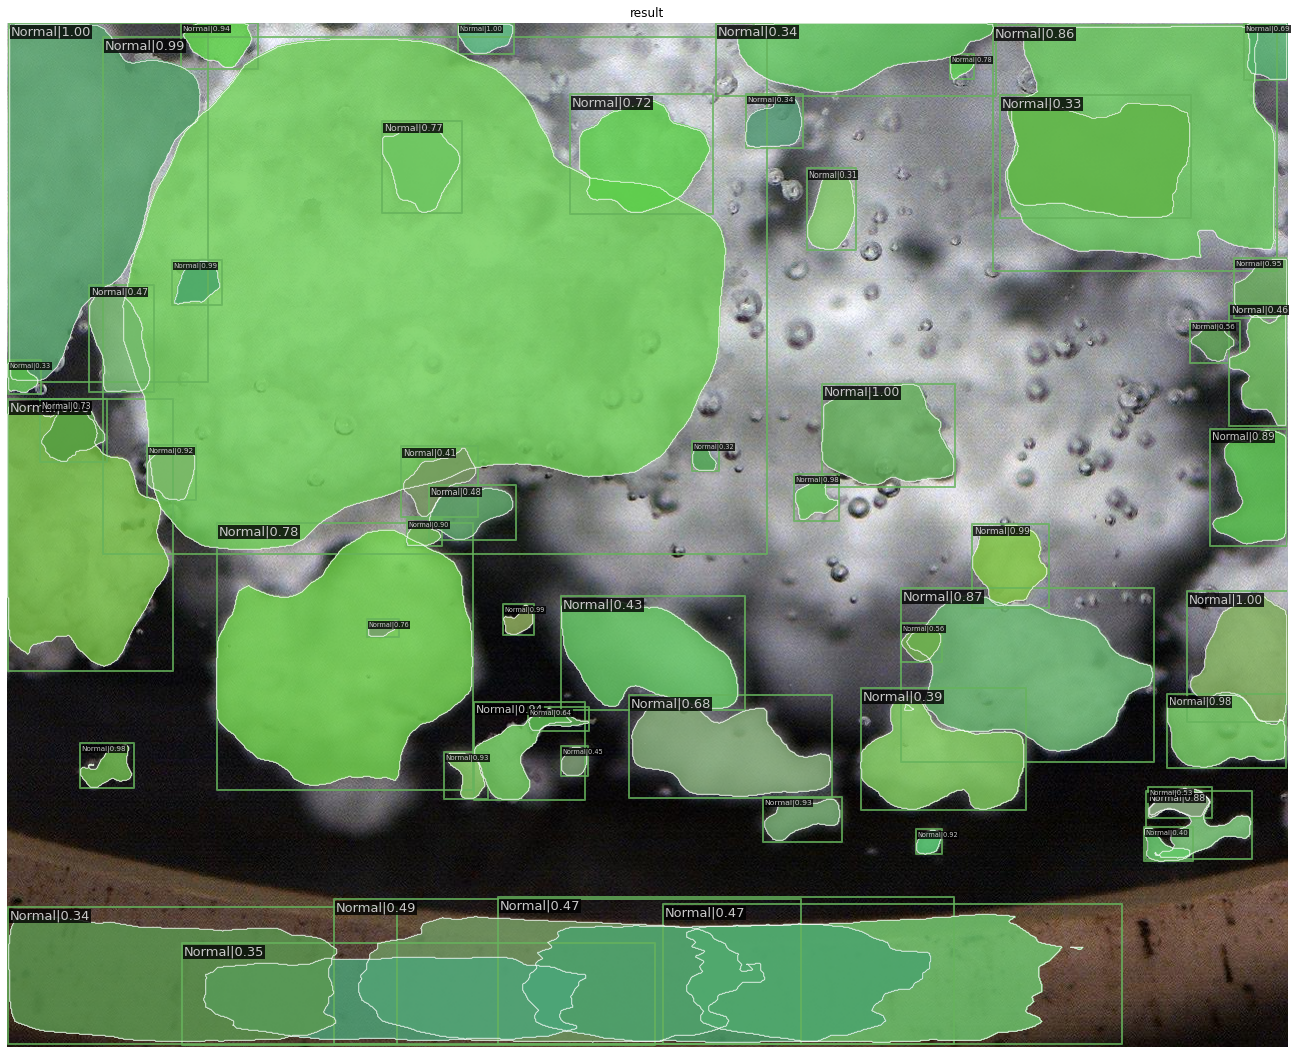

In [58]:
img = mmcv.imread(mm_path+'/data/dataset/test/1000.jpg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)

In [41]:
# model

In [48]:
# result

&nbsp;

### 모델 테스트 및 out json 확인

- 해당 코드는 mmdetection/tools/test.py 의 내용중에서 cfg를 바로 사용할수 있게 수정한 코드입니다.
- 추가적인 기능을 수행할때는 작동하지 않을수 있습니다. test.py 내용 확인은 해당 링크를 참조하시면 감사하겠습니다. 
[test.py](https://github.com/open-mmlab/mmdetection/blob/master/tools/test.py)


&nbsp;

- test를 수행하기 전에 cfg 기존 설정 다시 실행
- train을 수행하면서 설정된 내부 파라미터 초기화 위해서

In [27]:
cfg = set_config()

In [28]:
import argparse
import os
import os.path as osp
import time
import warnings

import mmcv
import torch
from mmcv import Config, DictAction
from mmcv.cnn import fuse_conv_bn
from mmcv.runner import (get_dist_info, init_dist, load_checkpoint,
                         wrap_fp16_model)

from mmdet.apis import multi_gpu_test, single_gpu_test
from mmdet.datasets import (build_dataloader, build_dataset,
                            replace_ImageToTensor)
from mmdet.models import build_detector
from mmdet.utils import (build_ddp, build_dp, compat_cfg, get_device,
                         replace_cfg_vals, setup_multi_processes,
                         update_data_root)





# 필요한 파라미터 설정
checkpoint='work_dirs/lg_mask/lg_cfg2/latest.pth' # 훈련시킨 모델 가중치
show=False
show_dir=None
show_score_thr=0.3
eval_options={'jsonfile_prefix': './work_dirs/out_json/predict'} # json 출력 저장위치
format_only = True
out = None





## 여기서 부터 기존의 mmdetection/tools/test.py 를 변경한 코드 ##

cfg = replace_cfg_vals(cfg)
update_data_root(cfg)
cfg = compat_cfg(cfg)
setup_multi_processes(cfg)



# set cudnn_benchmark
if cfg.get('cudnn_benchmark', False):
    torch.backends.cudnn.benchmark = True

if 'pretrained' in cfg.model:
    cfg.model.pretrained = None
elif 'init_cfg' in cfg.model.backbone:
    cfg.model.backbone.init_cfg = None

if cfg.model.get('neck'):
    if isinstance(cfg.model.neck, list):
        for neck_cfg in cfg.model.neck:
            if neck_cfg.get('rfp_backbone'):
                if neck_cfg.rfp_backbone.get('pretrained'):
                    neck_cfg.rfp_backbone.pretrained = None
    elif cfg.model.neck.get('rfp_backbone'):
        if cfg.model.neck.rfp_backbone.get('pretrained'):
            cfg.model.neck.rfp_backbone.pretrained = None



cfg.gpu_ids = [cfg.gpu_ids]
cfg.device = get_device()


distributed = False


test_dataloader_default_args = dict(
    samples_per_gpu=1, workers_per_gpu=2, dist=distributed, shuffle=False)

# in case the test dataset is concatenated
if isinstance(cfg.data.test, dict):
    cfg.data.test.test_mode = True
    if cfg.data.test_dataloader.get('samples_per_gpu', 1) > 1:
        # Replace 'ImageToTensor' to 'DefaultFormatBundle'
        cfg.data.test.pipeline = replace_ImageToTensor(
            cfg.data.test.pipeline)
elif isinstance(cfg.data.test, list):
    for ds_cfg in cfg.data.test:
        ds_cfg.test_mode = True
    if cfg.data.test_dataloader.get('samples_per_gpu', 1) > 1:
        for ds_cfg in cfg.data.test:
            ds_cfg.pipeline = replace_ImageToTensor(ds_cfg.pipeline)

test_loader_cfg = {
    **test_dataloader_default_args,
    **cfg.data.get('test_dataloader', {})
}

rank, _ = get_dist_info()


# build the dataloader
dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(dataset, **test_loader_cfg)

# build the model and load checkpoint
cfg.model.train_cfg = None
model = build_detector(cfg.model, test_cfg=cfg.get('test_cfg'))

fp16_cfg = cfg.get('fp16', None)
if fp16_cfg is not None:
    wrap_fp16_model(model)
checkpoint = load_checkpoint(model, checkpoint, map_location='cpu')


if 'CLASSES' in checkpoint.get('meta', {}):
    model.CLASSES = checkpoint['meta']['CLASSES']
else:
    model.CLASSES = dataset.CLASSES

if not distributed:
    model = build_dp(model, cfg.device, device_ids=cfg.gpu_ids)
    outputs = single_gpu_test(model, data_loader, show, show_dir,
                              show_score_thr)


rank, _ = get_dist_info()
if rank == 0:
    if out:
        print(f'\nwriting results to {out}')
        mmcv.dump(outputs, out)
    kwargs = {} if eval_options is None else eval_options
    if format_only:
        dataset.format_results(outputs, **kwargs)

/Users/cge/Documents/yeardream/프로젝트/7월_CV(LG화학)/LG화학_project/content/lg_test/mmdetection/mmdet/utils/setup_env.py:17: UserWarning: Multi-processing start method `fork` is different from the previous setting `spawn`.It will be force set to `fork`. You can change this behavior by changing `mp_start_method` in your config.
  warnings.warn(


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
load checkpoint from local path: work_dirs/lg_mask/lg_cfg2/latest.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 350/350, 0.5 task/s, elapsed: 770s, ETA:     0s

&nbsp;

### 최종 결과물은 predict.segm.json 형식으로 제출

In [29]:
import json
from datetime import datetime

with open(mm_path+f"/work_dirs/out_json/predict.bbox.json") as f:
    out_data1 = json.load(f)

with open(mm_path+ f"/work_dirs/out_json/predict.segm.json") as f:
    out_data2 = json.load(f)

In [31]:
len(out_data2)

34712